# [Neural Networks - Clothing assignment](https://www.kaggle.com/zalando-research/fashionmnist)

## Questions/Exercises:
### 1. Download the dataset programatically, and split the data into a train-test set.

In [67]:
import tensorflow as tf

#Since kaggle can be iffy, the dataset can also be extracted likewise, as it is a part of the tensorflow datasets
clothing = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = clothing.load_data()

#Normalizing/scaling the values to be between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#defining the labels in an array, as the testing data, has been given numbers/indexes depening on which clothing article it is.
clothing_labels = ['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
                   '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

### 2. Using TensorFlow, create a neural network and train it.

In [68]:
#Creating a sequential model and adding flatten input
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
#Adding dense layers with 128 neurons with the "default activation function relu"
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#Adding a final dense layer with neurons, which indicates how many classifications we have,
#which is 10 different clothing articales
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#Compiling how we want the data to be trained with an optimizer, loss and metrics
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [69]:
#Training of the model with 4 epochs, which means the data will go through 4 times.
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4832 - acc: 0.8221
Epoch 2/4
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3572 - acc: 0.8672
Epoch 3/4
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3177 - acc: 0.8820
Epoch 4/4
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2950 - acc: 0.8895


### 3. Use the provided test data, and evaluate the accuracy of the network.

In [70]:
#Evaluation of the training
val_loss, val_acc = model.evaluate(x_test, y_test)

print("In this evaluation the data failed {}% of the time, but succeeded {}% of the time!"
      .format(int(val_loss * 100), int(val_acc * 100)))

10000/10000 [==============================] - 0s 50us/sample - loss: 0.3486 - acc: 0.8731
In this evaluation the data failed 34% of the time, but succeeded 87% of the time!


In [75]:
import numpy as np
predictions = model.predict([x_test])

for x in range(10):
    pred_label = np.argmax(predictions[x])
    print("The label was:", pred_label, "which is the same as the label:", clothing_labels[pred_label])

The label was: 9 which is the same as the label: 9 Ankle boot
The label was: 2 which is the same as the label: 2 Pullover
The label was: 1 which is the same as the label: 1 Trouser
The label was: 1 which is the same as the label: 1 Trouser
The label was: 6 which is the same as the label: 6 Shirt
The label was: 1 which is the same as the label: 1 Trouser
The label was: 4 which is the same as the label: 4 Coat
The label was: 6 which is the same as the label: 6 Shirt
The label was: 5 which is the same as the label: 5 Sandal
The label was: 7 which is the same as the label: 7 Sneaker


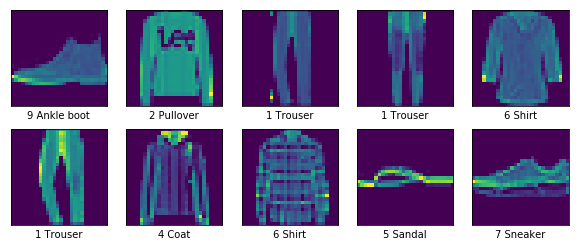

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

for x in range(10):
    plt.subplot(2, 5, x+1)
    plt.imshow(x_test[x])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(clothing_labels[y_test[x]])
plt.show()

## Reflection:
Looking at the evaluation, you can see that the successrate is at 87%, which indicates that the training of the data went pretty well.
This basically means that the data we've accumulated can almost always see/predict which clothing article is on the given image.

This can also be confirmed in the predictions and plotting of the test data, that the predictions are correct, for at least the first 10 images.

## Review Questions:
1. Did the student download the data programatically and split it into a train-test set?
2. Did the student use tesorflow to create a neural network and train it?
3. Did the student reflect on the accuracy of the network?